# Kaggle competition "Digit recognizer". 

results: accuracy = 0.993, place in  leardebord: 274 from 1894

accuracy(y_pred,y_test) is not presented it this code as kaggle competition does not provide y_test,
during the process of model bilding train dataset was split for train and test purposes 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install tensorflow

In [3]:
from sklearn.preprocessing      import OneHotEncoder
from sklearn.preprocessing      import StandardScaler
from sklearn.metrics            import accuracy_score
from sklearn.model_selection    import train_test_split
from tensorflow                 import keras
from tensorflow.keras           import layers
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
train_in = pd.read_csv("../input/digit-recognizer/train.csv")
test_in  = pd.read_csv("../input/digit-recognizer/test.csv")

In [5]:
train   = train_in.copy()
test    = test_in.copy()

In [6]:
train.iloc[400:430,]
#train['pixel777'].sum()
train['pixel477'].value_counts()

0     41997
21        1
71        1
64        1
Name: pixel477, dtype: int64

In [7]:
train.shape, train.dtypes, train.columns, train.index

((42000, 785),
 label       int64
 pixel0      int64
 pixel1      int64
 pixel2      int64
 pixel3      int64
             ...  
 pixel779    int64
 pixel780    int64
 pixel781    int64
 pixel782    int64
 pixel783    int64
 Length: 785, dtype: object,
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785),
 RangeIndex(start=0, stop=42000, step=1))

In [8]:
test.shape, test.dtypes, test.columns, test.index

((28000, 784),
 pixel0      int64
 pixel1      int64
 pixel2      int64
 pixel3      int64
 pixel4      int64
             ...  
 pixel779    int64
 pixel780    int64
 pixel781    int64
 pixel782    int64
 pixel783    int64
 Length: 784, dtype: object,
 Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
        'pixel7', 'pixel8', 'pixel9',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=784),
 RangeIndex(start=0, stop=28000, step=1))

In [9]:
ohe = OneHotEncoder(sparse = False)
y_df = train.pop('label')
#X_df = train.drop('label',axis =1)
X_train_df,X_ev_df,y_tr,y_e = train_test_split(train,y_df,train_size = 0.9, random_state =0)

In [10]:
train.shape

(42000, 784)

In [11]:
print(y_tr.shape,type(y_tr),y_e.shape,type(y_e))
y_train = keras.utils.to_categorical(y_tr,num_classes = 10)
y_ev    = keras.utils.to_categorical(y_e ,num_classes = 10)
print(y_train.shape,type(y_train),y_ev.shape,type(y_ev))

(37800,) <class 'pandas.core.series.Series'> (4200,) <class 'pandas.core.series.Series'>
(37800, 10) <class 'numpy.ndarray'> (4200, 10) <class 'numpy.ndarray'>


In [12]:
print(X_train_df.shape,type(X_train_df),X_ev_df.shape,type(X_ev_df))
X_train = np.array(X_train_df)
X_ev    = np.array(X_ev_df)
print(X_train.shape,type(X_train),X_ev.shape,type(X_ev))

(37800, 784) <class 'pandas.core.frame.DataFrame'> (4200, 784) <class 'pandas.core.frame.DataFrame'>
(37800, 784) <class 'numpy.ndarray'> (4200, 784) <class 'numpy.ndarray'>


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Scaling
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [15]:
X_train.shape

(37800, 784)

In [16]:
# Reshape to 28*28, simple standardization
X_train = np.array(X_train).reshape(-1,28,28,1).astype('float32')
X_ev    = np.array(X_ev)   .reshape(-1,28,28,1).astype('float32')
test    = np.array(test)   .reshape(-1,28,28,1).astype('float32')

In [17]:
# Alternative way for scaling
#X_train = X_train /255
#X_ev    = X_ev    /255
#test    = test    /255 

In [18]:
X_train_mean  = np.mean(X_train)
X_train_std   = np.std (X_train)
X_train = (X_train - X_train_mean)/X_train_std
X_ev    = (X_ev    - X_train_mean)/X_train_std
test    = (test    - X_train_mean)/X_train_std
print(X_train_mean,X_train_std)

33.414413 78.683174


In [19]:
early_stopping = EarlyStopping(min_delta =0.0005, patience =4,restore_best_weights =True)

In [20]:
model = keras.Sequential( [#pretrained_base,
                            layers.Conv2D(filters=32, kernel_size=3,input_shape=(28,28,1), activation ='relu'),
                            layers.BatchNormalization(),
                            #layers.Dropout(rate = 0.3),
                            #layers.Conv2D(filters=32, kernel_size=3,activation ='relu'),                       
                            #layers.BatchNormalization(),
                            #layers.Dropout(rate = 0.3),
    
                            layers.Conv2D(filters=64, kernel_size=3,activation ='relu'),                       
                            layers.BatchNormalization(),                                                   
                            layers.Dropout(rate = 0.3),    
                            layers.Conv2D(filters=64, kernel_size=3,activation ='relu'),                       
                            layers.BatchNormalization(),
                            #layers.Dropout(rate = 0.3),
                            layers.Conv2D(filters=64, kernel_size=3,activation ='relu'),                       
                            layers.BatchNormalization(),
                            layers.MaxPooling2D(pool_size = 2),                                                    
                            layers.Dropout(rate = 0.3),
    
                            layers.Conv2D(filters=128, kernel_size=3,activation ='relu'),                       
                            layers.BatchNormalization(),
                            layers.MaxPooling2D(pool_size = 2),                                                    
                            layers.Dropout(rate = 0.3),
                            
                            layers.Flatten(),   
                            layers.Dense(units =256, activation = 'relu'),
                            layers.BatchNormalization(),
                            layers.Dropout(rate = 0.3),
                                                 
    
                            #layers.Flatten(),                            
                            layers.Dense(units =10 , activation = 'softmax'),
                            ])
model.compile(optimizer = "adam",loss = keras.losses.CategoricalCrossentropy(),metrics = ["accuracy"])
model_fit = model.fit(X_train,y_train, epochs =50,
                      callbacks =[early_stopping],
                      validation_data = (X_ev,y_ev))
#y_pred = model.predict(X_ev)
#accuracy_score(y_ev,y_pred)

Epoch 1/50
1182/1182 [==============================] - 339s 285ms/step - loss: 0.1666 - accuracy: 0.9475 - val_loss: 0.0469 - val_accuracy: 0.9833
Epoch 2/50
1182/1182 [==============================] - 337s 285ms/step - loss: 0.0644 - accuracy: 0.9799 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 3/50
1182/1182 [==============================] - 340s 288ms/step - loss: 0.0578 - accuracy: 0.9819 - val_loss: 0.0316 - val_accuracy: 0.9898
Epoch 4/50
1182/1182 [==============================] - 331s 280ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0315 - val_accuracy: 0.9902
Epoch 5/50
1182/1182 [==============================] - 335s 283ms/step - loss: 0.0402 - accuracy: 0.9868 - val_loss: 0.0329 - val_accuracy: 0.9898
Epoch 6/50
1182/1182 [==============================] - 333s 281ms/step - loss: 0.0393 - accuracy: 0.9879 - val_loss: 0.0344 - val_accuracy: 0.9926
Epoch 7/50
1182/1182 [==============================] - 331s 280ms/step - loss: 0.0321 - accuracy: 0.9899 - val_

In [21]:
y_pred = model.predict(X_ev)
y_pred_one_d = np.argmax(y_pred, axis =1)
y_ev_one_d   = np.argmax(y_ev  , axis =1)
print(accuracy_score(np.array(y_e),y_pred_one_d))
print(np.array(y_e).shape,type(np.array(y_e)))
print(y_pred_one_d.shape ,type(y_pred_one_d))

132/132 [==============================] - 10s 77ms/step
0.9928571428571429
(4200,) <class 'numpy.ndarray'>
(4200,) <class 'numpy.ndarray'>


In [22]:
y_test       = model.predict(test)
y_test_one_d = np   .argmax(y_test, axis =1)

875/875 [==============================] - 67s 77ms/step


In [23]:
test_in.shape[0],y_test_one_d.size,y_test.size

(28000, 28000, 280000)

In [24]:
res = pd.DataFrame({'ImageId':[i for i in range(1,test_in.shape[0]+1)],'Label':y_test_one_d} )
res.to_csv('submission_1.csv', index = False)

(<AxesSubplot:>, <AxesSubplot:>)

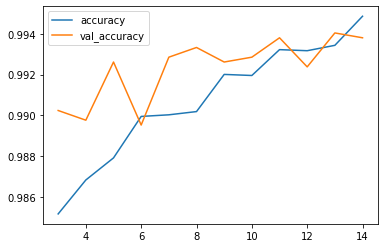

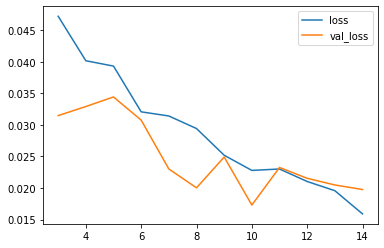

In [25]:
history_df = pd.DataFrame(model_fit.history)
accuracies = history_df[['accuracy','val_accuracy']]
losses     = history_df[['loss'    ,'val_loss'    ]]
accuracies[3:].plot(),losses[3:].plot() 

In [26]:
pd.DataFrame(model_fit.history).columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        3